# Leading Causes of Death in the United States of America

## Data

We will work with a dataset published by the Centers for Disease Control and Prevention. The data, provided by the Department of Health and Human Services, shows the ten leading causes of death in the US from 1999 to 2016 (the eleventh cause is the combination of two or more causes of death.) The population representing pre-2010 relies on a per 100,000 persons estimate. The years post-2010 relies on the 2010 population census. The data itself comes from death certificates filed for residents in all fifty states and the District of Columbia.

The data classifies the causes of death both by demographic and disease. Each row in the dataset represents the following information: year of death, cause of death, the number of deaths, and the age-adjusted death rate. 

The causes represented in the data: 
- Accidents (unintentional injuries) 
- All Causes                                                              
- Alzheimer's disease                                                 
- Stroke (cerebrovascular diseases)                                        
- Chronic lower respiratory diseases (CLRD)                              
- Diabetes (diabetes mellitus)                                               
- Heart Diseases                               
- Influenza and pneumonia                                         
- Suicide (intentional self-harm)                     
- Cancer (malignant neoplasms)                                            
- Kidney diseases (nephritis, nephrotic syndrome and nephrosis - loss of protein/loss of blood)

There are four challenges to this dataset. First, certifying physicians may fail to list underlying diseases that lead to a death. This creates an underestimate of the total occurrences of the diseases found in this dataset. There is also the possibility the treating physician gives an incorrect diagnosis. This can contribute to misclassified causes of death in the dataset. Many states require a second death certificate for residents who die outside of the state. Thus, it is reasonable to assume this data may have duplicates. The data uses two different methods to gather populations estimates. Each of these methods introduce their own limitations to the data.


## Analytic Questions
We will explore the following questions:
1. How many deaths per cause of death occurred from 1999 to 2016?
2. What is the average cause of death per year for heart disease, cancer and stroke?
3. What states experienced the most/least number of deaths caused by heart disease, cancer and stroke?


## Conclusion
According to this dataset, the top three leading causes of death in the United States from 1999 to 2016 were heart disease, cancer and stroke. California and New York experienced the most deaths caused by heart disease and cancer. California, Texas and Florida experienced the most deaths by stroke. Alaska and Wyoming experienced the least deaths of all three causes of death. 

In [19]:
#Import the packages used for this dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import plotly.plotly as py 
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='SarahJuanaAristil', 
                                  api_key='OY5bz8ZxYNzDfbcKvXXk')
py.iplot

<function plotly.plotly.plotly.iplot(figure_or_data, **plot_options)>

In [20]:
from plotly.offline import init_notebook_mode, plot

init_notebook_mode(connected=True)

print("plotly version:", __version__)

NameError: name '__version__' is not defined

In [ ]:
#Import the data
mortality_census = pd.read_csv("NCHS_-_Leading_Causes_of_Death__United_States (1).csv")

In [ ]:
#Show the data
mortality_census

In [ ]:
stroke_2016 = (mortality_census[(mortality_census["Cause Name"] == "Stroke") & (mortality_census["Year"] == 2016)])

In [ ]:
stroke_2016.mean()

We know the leading causes of death in the United States from 1999 to 2016. Let's look at sum of deaths caused by each during this timeframe.

#### 1. How many deaths per cause of death occurred from 1999 to 2016?

In [ ]:
#Grouping the number of deaths by the cause of death
mortality_census['Deaths'].groupby(mortality_census['Cause Name']).sum()

In [ ]:
#Creating the foundational dictionary for the bar graph
cause_and_death = {'All causes':89405359, 'Alzheimer\'s':2746824,'CLRD':4869452, 
     'Cancer':20489072,'Diabetes': 2632758, 'Heart': 23150366 , 'Influenza':2077938, 
     'Kidney': 1615960, 'Stroke': 5160280, 'Suicide': 1299686, 
     'Accident':4355768,}

In [ ]:
#Creating a bar graph of the total number of deaths per cause

plt.bar(range(len(cause_and_death)), cause_and_death.values(), 
        align='center', color='#696969')
plt.xticks(range(len(cause_and_death)), list(cause_and_death.keys()), 
           fontsize=10, rotation=45)

plt.rcParams["figure.figsize"] = (8, 8)
plt.yticks(fontsize=10)
plt.title('Total Deaths per Cause in US from 1999 to 2016', fontsize=12)
plt.xlabel('Cause of Death', fontsize=10)
plt.ylabel('Number of Deaths (in 10 million)', fontsize=10)   

plt.show()

"All Causes" represents the sum of two or more diseases already represented in the graph. The repetitiveness skews the outcome of the data. To get a better view of the individual causes of death, this column is removed.

In [ ]:
#Total deaths per cause minus "All causes"
cause_and_death.pop('All causes')

In [ ]:
#Creating a bar graph of the total deaths per cause minus "All causes"

plt.bar(range(len(cause_and_death)), cause_and_death.values(), 
        align='center', color='#696969')
plt.xticks(range(len(cause_and_death)), list(cause_and_death.keys()), 
           fontsize=10, rotation=45)

plt.rcParams["figure.figsize"] = (8, 8)
plt.yticks(fontsize=10)
plt.title('Total Deaths per Cause in US from 1999 to 2016', fontsize=12)
plt.xlabel('Cause of Death', fontsize=10)
plt.ylabel('Number of Deaths (in 10 million)', fontsize=10)   

plt.show()

Removing "All Causes" provides a more insightful look into the leading causes of death. This graph reveals the top three causes of death are heart disease, cancer, and stroke. 

We know now the top three causes of deaths. Did the number of deaths of each cause increase or decrease over the years?

#### 2. What is the average cause of death per year for heart disease, cancer and stroke?

In [21]:
#Grouping the deaths by the year and cause and getting the average mortality rate 
year_cause_deathsum = mortality_census.groupby(['Year', 'Cause Name'])['Deaths'].mean()

In [22]:
year_cause_deathsum

Year  Cause Name             
1999  All causes                  91976.884615
      Alzheimer's disease          1712.923077
      CLRD                         4776.192308
      Cancer                      21147.615385
      Diabetes                     2630.730769
      Heart disease               27892.000000
      Influenza and pneumonia      2451.153846
      Kidney disease               1366.346154
      Stroke                       6437.153846
      Suicide                      1123.038462
      Unintentional injuries       3763.846154
2000  All causes                  92436.576923
      Alzheimer's disease          1906.076923
      CLRD                         4692.653846
      Cancer                      21272.730769
      Diabetes                     2665.423077
      Heart disease               27336.923077
      Influenza and pneumonia      2512.038462
      Kidney disease               1432.730769
      Stroke                       6448.500000
      Suicide                 

In [23]:
#To see all of the years in the variable year_cause_deathsum
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(year_cause_deathsum)

Year  Cause Name             
1999  All causes                  91976.884615
      Alzheimer's disease          1712.923077
      CLRD                         4776.192308
      Cancer                      21147.615385
      Diabetes                     2630.730769
      Heart disease               27892.000000
      Influenza and pneumonia      2451.153846
      Kidney disease               1366.346154
      Stroke                       6437.153846
      Suicide                      1123.038462
      Unintentional injuries       3763.846154
2000  All causes                  92436.576923
      Alzheimer's disease          1906.076923
      CLRD                         4692.653846
      Cancer                      21272.730769
      Diabetes                     2665.423077
      Heart disease               27336.923077
      Influenza and pneumonia      2512.038462
      Kidney disease               1432.730769
      Stroke                       6448.500000
      Suicide                 

In [24]:
#Dictionary for the year and average number of deaths for heart disease
dict_heart_disease = {'1999': 27892.000000, '2000': 27336.923077, '2001': 26928.538462,
                      '2002': 26805.653846, '2003': 26349.576923, '2004': 25095.615385,
                      '2005': 25080.423077, '2006': 24293.692308, '2007': 23694.884615,
                      '2008': 23724.153846, '2009': 23054.346154, '2010': 22988.038462,
                      '2011': 22945.269231, '2012': 23065.807692, '2013': 23504.038462,
                      '2014': 23628.769231, '2015': 24378.538462, '2016': 24433.076923,}

In [25]:
#Dictionary for the year and average number of deaths for cancer
dict_cancer = {'1999': 21147.615385, '2000': 21272.730769, '2001': 21298.769231,
               '2002': 21433.500000, '2003': 21419.307692, '2004': 21303.384615, 
               '2005': 21512.000000, '2006': 21534.153846, '2007': 21649.038462,
               '2008': 21748.807692, '2009': 21831.846154, '2010': 22105.500000,
               '2011': 22180.423077, '2012': 22408.576923, '2013': 22495.423077, 
               '2014': 22757.692308, '2015': 22920.384615, '2016': 23001.461538,}

In [26]:
#Dictionary for the year and average number of deaths for stroke
dict_stroke = {'1999': 6437.153846, '2000': 6448.500000, '2001': 6289.923077,
               '2002': 6256.615385, '2003': 6064.961538, '2004': 5772.076923,
               '2005': 5522.269231, '2006': 5273.807692, '2007': 5228.923077,
               '2008': 5159.538462, '2009': 4955.461538, '2010': 4979.846154,
               '2011': 4958.923077, '2012': 4944.076923, '2013': 4960.692308, 
               '2014': 5119.346154, '2015': 5397.038462, '2016': 5467.000000,}

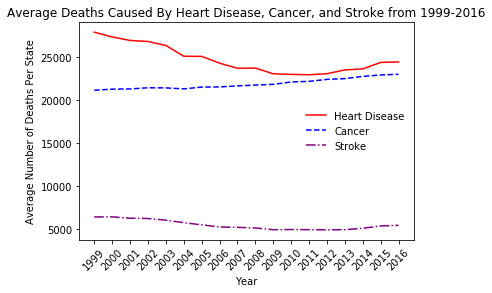

In [27]:
#Creating a matplotlib line graph for the year and average number of deaths
#for heart disease, cancer, and stroke

heart_disease_years = list(dict_heart_disease.keys())           
heart_disease_deaths = list(dict_heart_disease.values())        

cancer_years = list(dict_cancer.keys())
cancer_deaths = list(dict_cancer.values())

stroke_years = list(dict_stroke.keys())
stroke_deaths = list(dict_stroke.values())

heart_disease_plot = plt.plot(heart_disease_years, heart_disease_deaths, color='red',
                              linestyle='solid', label='Heart Disease')
cancer_plot = plt.plot(cancer_years, cancer_deaths, color='blue', label='Cancer', 
                       linestyle='dashed')
stroke_plot = plt.plot(stroke_years, stroke_deaths, color='purple',
                       linestyle='dashdot', label='Stroke' )

plt.rcParams['figure.figsize'] = (8,8)
plt.xlabel('Year', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Average Number of Deaths Per State', fontsize=10)
plt.ylim(0, 30000)
plt.yticks(fontsize=10)

plt.title('Average Deaths Caused By Heart Disease, Cancer, and Stroke from 1999-2016',
          fontsize=12)
plt.legend(loc='best', fontsize=10, frameon=False)
plt.axis('tight')
plt.show()

In [28]:
#Percentage increase for the continued rise of cancer
cancer_percent_increase = ((23001.461538 - 21147.615385)/23001.461538)*100

In [29]:
cancer_percent_increase

8.059688511259672

The graph shows the most deaths caused by heart disease occured in 1999. A steady decline occurred from 1999 to 2009. 2009 experienced the lowest deaths. The deaths remained consistent till 2013 where it began to increase again.

The most deaths caused by cancer occurred in 2016, with 1999 experiencing the lowest deaths. The number of deaths increased by about 8 percent from 1999 to 2016.

The most deaths caused by stroke occurred in 1999. 2009 experienced the lowest average number of deaths. A gradual decrease occurred from 2002 to 2009. The deaths remained consistent till 2014 where it began to increase again.

This graph shows the average deaths caused by heart disease, cancer and stroke from 1999 to 2016. But, how were these deaths dispersed throughout the United States?

#### 3. What states experienced the most/least number of deaths caused by heart disease, cancer and stroke?

In [30]:
#Importing the state and state code for the United States
usa_states = pd.read_csv('50_us_states_all_data.csv', header=None)

In [31]:
usa_states

,0,1,2,3
0,ALABAMA,Alabama,AL,Ala.
1,ALASKA,Alaska,AK,Alaska
2,ARIZONA,Arizona,AZ,Ariz.
3,ARKANSAS,Arkansas,AR,Ark.
4,CALIFORNIA,California,CA,Calif.
5,COLORADO,Colorado,CO,Colo.
6,CONNECTICUT,Connecticut,CT,Conn.
7,DELAWARE,Delaware,DE,Del.
8,FLORIDA,Florida,FL,Fla.
9,GEORGIA,Georgia,GA,Ga.


In [32]:
#Renaming the columns so it is easier to work with
usa_states.columns = ['State_Caps', 'State', 'Code', 'Extended_Code']

In [33]:
usa_states

,State_Caps,State,Code,Extended_Code
0,ALABAMA,Alabama,AL,Ala.
1,ALASKA,Alaska,AK,Alaska
2,ARIZONA,Arizona,AZ,Ariz.
3,ARKANSAS,Arkansas,AR,Ark.
4,CALIFORNIA,California,CA,Calif.
5,COLORADO,Colorado,CO,Colo.
6,CONNECTICUT,Connecticut,CT,Conn.
7,DELAWARE,Delaware,DE,Del.
8,FLORIDA,Florida,FL,Fla.
9,GEORGIA,Georgia,GA,Ga.


In [34]:
#Finding the dispersion of deaths caused by heart disease in the United States
#The results for the "United States" is removed from the results
usa_heart_disease = mortality_census[(mortality_census['Cause Name'] == 'Heart disease')
                                     & (mortality_census['State'] != 'United States')]

In [35]:
#This is the sum of heart disease per state and will be the input data used for the graph
usa_hd_input = usa_heart_disease.groupby(['State'])['Deaths'].sum().to_frame().reset_index()

In [36]:
#Double checking work thus far
usa_hd_input.head(5)

,State,Deaths
0,Alabama,227433
1,Alaska,12107
2,Arizona,193063
3,Arkansas,138372
4,California,1141776


In [37]:
#Checking for the columns that will be used for the graph
usa_states.columns

Index(['State_Caps', 'State', 'Code', 'Extended_Code'], dtype='object')

In [38]:
#Grabbing only the columns needed for the graph
usa_states = usa_states[['Code', 'State']]

In [39]:
#Combining the state & code mapping with the input data for heart disease
usa_hd_final = pd.merge(usa_hd_input, usa_states, on='State', how='inner')

In [ ]:
#A choropleth map is used to display this information on a United States map. 
for col in usa_hd_final.columns:
    usa_hd_final[col] = usa_hd_final[col].astype(str)
    
#The colorscale for the geographical representation of the data  
scl = [[0.0, 'rgb(242,240,247)'],[0.3, 'rgb(218,218,235)'],[0.6, 'rgb(188,189,220)'],\
            [0.9, 'rgb(158,154,200)'],[1.2, 'rgb(117,107,177)']]

#The text that will show over each state on the map
usa_hd_final['text'] = usa_hd_final['Code'] + '<br>' + 'Deaths '+usa_hd_final['Deaths']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        reversescale = False,
    #The location is the data for the state abbreviations found in the usa_states variable
        locations = usa_hd_final['Code'],
    #The locationmode tells plotly to use a map of the United States of America
        locationmode = 'USA-states',
    #Z is the numerical measurement of each state
        z = usa_hd_final['Deaths'].astype(float),
        text = usa_hd_final['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
    #The title for the right side bar color representation
        colorbar = dict(
            title = "Deaths per 100,000 persons")
        ) ]

layout = dict(
        title = 'Deaths Caused By Heart Disease in US from 1999 to 2016<br>(Hover for breakdown)',
        geo = dict(
            projection=dict( type='albers usa' ),
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-cloropleth-map' )
   

![title](Death_Heart_Disease.png)

According to the map, California and New York experienced the most deaths by heart disease (over 800,000). Closely following were Florida, Texas and Philadelphia (over 600,000). The states with the least deaths were Alaska and Wyoming with under 20,000 deaths. Following are Vermont, North and South Dakota with under 35,000 deaths. 

The map also shows the midwest experienced the least number of deaths overall. The number of deaths increase towards the east coast.  

We will examine deaths caused by cancer next. 

In [41]:
#The above method is repeated for both cancer and stroke
usa_cancer = mortality_census[(mortality_census['Cause Name'] == 'Cancer')
                             & (mortality_census['State'] != 'United States')]

In [42]:
#Cancer input data
usa_cancer_input = usa_cancer.groupby(['State'])['Deaths'].sum().to_frame().reset_index()

In [43]:
#Combining state & code mapping with input data
usa_cancer_final = pd.merge(usa_cancer_input, usa_states, on='State', how='inner')

In [44]:
for col in usa_cancer_final.columns:
    usa_cancer_final[col] = usa_cancer_final[col].astype(str)
    
    
scl = [[0.0, 'rgb(135,206,250)'],[0.2, 'rgb(100,149,237)'],[0.4, 'rgb(65,105,225)'],
            [0.6, 'rgb(0,0,255)'],[0.8, 'rgb(0,0,205)'],[1.0, 'rgb(25,25,112)']]

usa_cancer_final['text'] = usa_cancer_final['Code'] + '<br>' + 'Deaths '
+usa_cancer_final['Deaths']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        reversescale = False,
        locations = usa_cancer_final['Code'],
        locationmode = 'USA-states',
        z = usa_cancer_final['Deaths'].astype(float),
        text = usa_cancer_final['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Deaths per 100,000 persons")
        ) ]

layout = dict(
        title = 'Deaths Causes By Cancer in US from 1999 to 2016<br>(Hover for breakdown)',
        geo = dict(
            projection=dict( type='albers usa' ),
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-cloropleth-map' )
   

This map reveals that California and Florida experienced the most deaths by cancer (over 700,000). Closely following are New York, Texas and Philadelphia (over 500,000). The states with the least deaths were: Alaska and Wyoming with under 20,000 deaths. Following are Vermont, North and South Dakota with under 30,000 deaths. 

The map again shows the midwest experienced the least number of deaths overall. The numbers of deaths also increase towards the east coast, but it is not as homogenous as with heart disease. The death increase occurs more independently from state to state. 

We will examine deaths caused by stroke next. 

In [45]:
#Finding the dispersion of deaths caused by stroke in the United States
usa_stroke = mortality_census[(mortality_census['Cause Name'] == 'Stroke')
                              & (mortality_census['State'] != 'United States')]

In [46]:
#Stroke input data
usa_stroke_input = usa_stroke.groupby(['State'])['Deaths'].sum().to_frame().reset_index()

In [47]:
#Combining state & code mapping with data
usa_stroke_final = pd.merge(usa_stroke_input, usa_states, on='State', how='inner')

In [48]:
for col in usa_stroke_final.columns:
    usa_stroke_final[col] = usa_stroke_final[col].astype(str)
    
    
scl = [[0.0, 'rgb(216,191,216)'],[0.2, 'rgb(221,160,221)'],[0.4, 'rgb(218,112,214)'],
            [0.6, 'rgb(186,85,211)'],[0.8, 'rgb(153,50,204)'],[1.0, 'rgb(139,0,139)']]

usa_stroke_final['text'] = usa_stroke_final['Code'] + '<br>' + 'Deaths '+usa_stroke_final['Deaths']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        reversescale = False,
        locations = usa_stroke_final['Code'],
        locationmode = 'USA-states',
        z = usa_stroke_final['Deaths'].astype(float),
        text = usa_stroke_final['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Deaths per 100,000 persons")
        ) ]

layout = dict(
        title = 'Deaths Causes By Stroke in US from 1999 to 2016<br>(Hover for breakdown)',
        geo = dict(
            projection=dict( type='albers usa' ),
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-cloropleth-map' )
   

This map reveals that California, Texas and Florida experienced the most deaths by stroke (over 170,000). Following were Philadelphia, New York, Ohio and Illinois which experienced over 100,000 deaths. The states with the least deaths were Alaska and Wyoming with under 5,000 deaths. Following were North Dakota, South Dakota, Montana, and Vermont with under 10,000 deaths. The map again shows the midwest experienced the least number of deaths. However, death by stroke is not largely seen in majority parts of the United States.

## Conclusion

According to this dataset, the top three leading causes of death in the United States from 1999 to 2016 were heart disease, cancer and stroke. California and New York experienced the most deaths by heart disease and cancer. California, Texas and Florida experienced the most deaths by stroke. Alaska, Wyoming experienced the least of all three causes of death. 

Further research with this dataset could explore differences in state environments. Do states with high deaths share similar environmental concerns such as air pollution and water quality? It could explore state agriculture and dietary habits. For example, the midwest consistently experienced the least amount of deaths. Is there a difference in their environment or diet? Additional research can also compare every states' federal  assistance for preventive healthcare initiatives. With the increase of data size, this study would make use of a database and SQL to further analyze across tables.

The limitation of this dataset is that it does not include details on state population. This may be an implicit contributing factor. The states experiencing the highest deaths also have larger populations. Likewise, states experiencing the lowest number of deaths have lower populations. Information on population during this timeframe would help determine the ratio of deaths relative to state population. Another drawback is the map does not represent the District of Columbia. 

##### -Sarah Aristil
###### Thinkful Data Scientist Student